In [4]:
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
def display_best_fit_2048(size="small", rel_pos_emb="linear_cpb"):
    a = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"1_all_losses.npy", allow_pickle=True)
    b = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"2_all_losses.npy", allow_pickle=True)
    c = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"3_all_losses.npy", allow_pickle=True)
    d = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"4_all_losses.npy", allow_pickle=True)
    e = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"5_all_losses.npy", allow_pickle=True)

    all = np.array([a, b, c, d, e])
    all_avg = np.mean(all, axis=0)
    all_avg = np.mean(all_avg, axis=0)

    x = np.arange(len(all_avg))[128:]
    y = all_avg[128:]

    m, b = np.polyfit(x, y, 1)

    print("Relative positional embedding type:", rel_pos_emb)
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.plot(x, all_avg[128:])
    plt.plot(x, m*x+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size " + size)
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Relative positional embedding type: linear_cpb
Loss slope across token index: 7.382606693094317e-07
Loss offset: 5.20647874444337


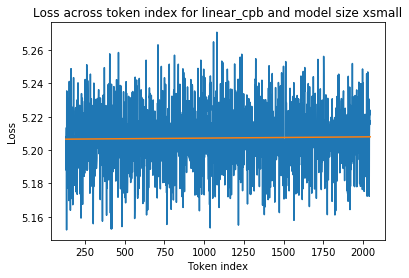

Relative positional embedding type: log_cpb
Loss slope across token index: 1.0582429128392825e-06
Loss offset: 5.195921509602078


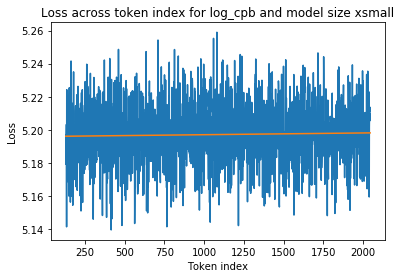

Relative positional embedding type: fourier_cpb
Loss slope across token index: 0.00023104240518697844
Loss offset: 5.203576756244917


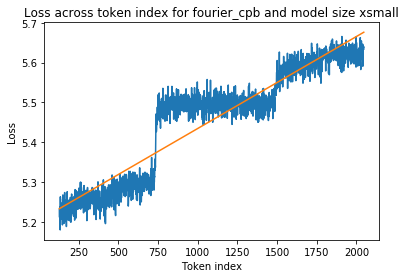

Relative positional embedding type: alibi
Loss slope across token index: 8.901720126939598e-07
Loss offset: 5.312968370035365


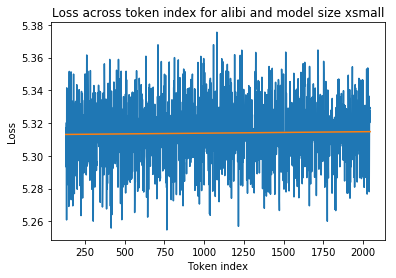

Relative positional embedding type: rotary
Loss slope across token index: 0.00022613600014336838
Loss offset: 5.625763570538174


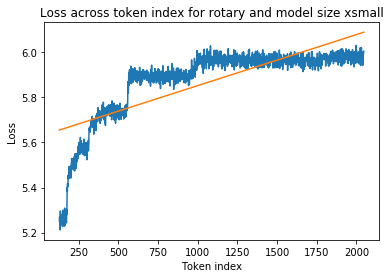

In [7]:
display_best_fit_2048("xsmall", "linear_cpb")
display_best_fit_2048("xsmall", "log_cpb")
display_best_fit_2048("xsmall", "fourier_cpb")
display_best_fit_2048("xsmall", "alibi")
display_best_fit_2048("xsmall", "rotary")

Relative positional embedding type: linear_cpb
Loss slope across token index: 8.072748706829849e-07
Loss offset: 5.013195972734188


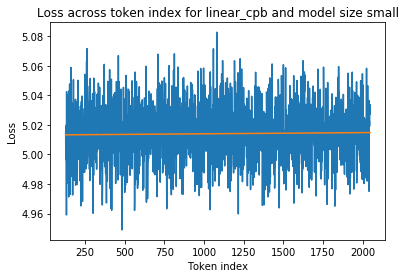

Relative positional embedding type: log_cpb
Loss slope across token index: 2.079706944251717e-06
Loss offset: 5.016636890280346


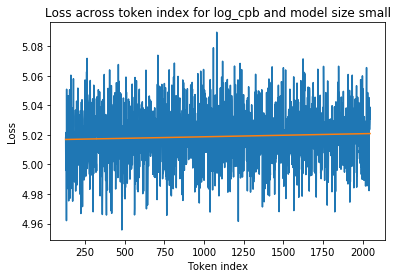

Relative positional embedding type: fourier_cpb
Loss slope across token index: 0.00027481693713235256
Loss offset: 4.997550006668256


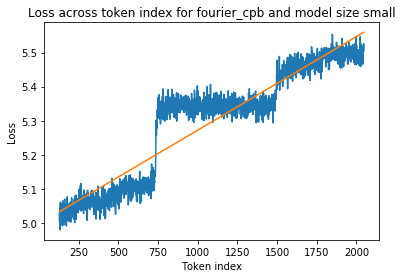

Relative positional embedding type: alibi
Loss slope across token index: 8.918046403364356e-07
Loss offset: 5.062218402865418


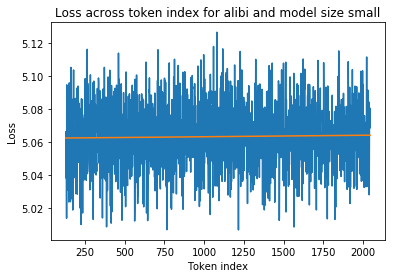

Relative positional embedding type: rotary
Loss slope across token index: 0.00030035362530314336
Loss offset: 5.618641940648451


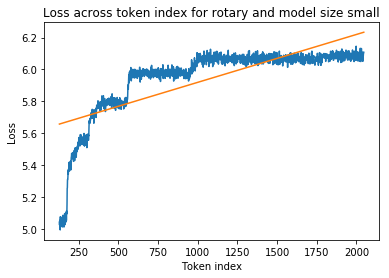

In [8]:
display_best_fit_2048("small", "linear_cpb")
display_best_fit_2048("small", "log_cpb")
display_best_fit_2048("small", "fourier_cpb")
display_best_fit_2048("small", "alibi")
display_best_fit_2048("small", "rotary")

In [9]:
def display_best_fit_2048_trained(size="xsmall", rel_pos_emb="linear_cpb"):
    a = np.load("results_relative_trained2048/result_"+size+"_"+rel_pos_emb+"1_2048_losses.npz")
    a = a.f.arr_0
    all_avg = np.mean(a, axis=0)


    x = np.arange(len(all_avg))[128:]
    y = all_avg[128:]

    m, b = np.polyfit(x, y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(all_avg[1000] - all_avg[50])
    print("Meta-learning loss @ 500 - 50")
    print(all_avg[500] - all_avg[50])
    print("Meta-learning loss @ 250 - 50")
    print(all_avg[250] - all_avg[50])


    print("Model trained at length 2048:")
    print("Relative positional embedding type:", rel_pos_emb)
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.plot(x, all_avg[128:])
    plt.plot(x, m*x+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size " + size)
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
-0.06862641978230233
Meta-learning loss @ 500 - 50
-0.04328959608724858
Meta-learning loss @ 250 - 50
0.001910457860456738
Model trained at length 2048:
Relative positional embedding type: linear_cpb
Loss slope across token index: 1.052155134599495e-06
Loss offset: 5.0367779471978595


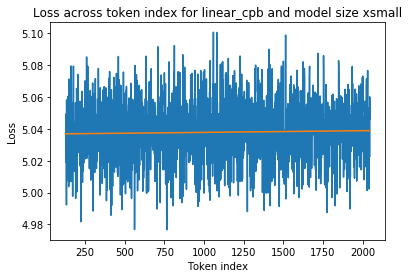

Meta-learning loss @ 1000 - 50
-0.09415066632915003
Meta-learning loss @ 500 - 50
-0.0780296990756284
Meta-learning loss @ 250 - 50
-0.014848171949611633
Model trained at length 2048:
Relative positional embedding type: log_cpb
Loss slope across token index: -1.1831535045351049e-06
Loss offset: 5.066855582369581


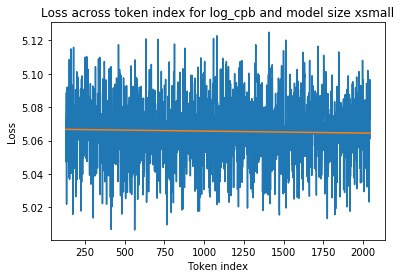

Meta-learning loss @ 1000 - 50
-0.07756134002620385
Meta-learning loss @ 500 - 50
-0.07034245843757958
Meta-learning loss @ 250 - 50
-0.002461009654053825
Model trained at length 2048:
Relative positional embedding type: fourier_cpb
Loss slope across token index: -1.2326103116532124e-09
Loss offset: 5.108371037742887


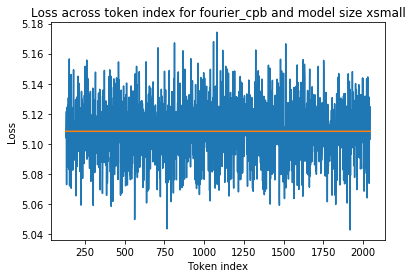

Meta-learning loss @ 1000 - 50
-0.059117500079506335
Meta-learning loss @ 500 - 50
-0.04960899902526705
Meta-learning loss @ 250 - 50
0.0046204841396768614
Model trained at length 2048:
Relative positional embedding type: alibi
Loss slope across token index: 7.713408641571533e-07
Loss offset: 5.096401250860112


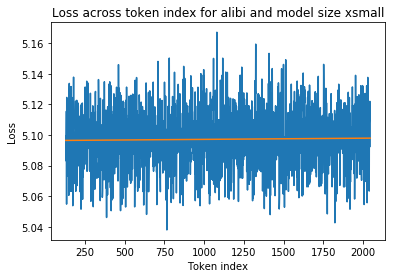

Meta-learning loss @ 1000 - 50
-0.09294660487798545
Meta-learning loss @ 500 - 50
-0.08163231111664526
Meta-learning loss @ 250 - 50
-0.017029621126472883
Model trained at length 2048:
Relative positional embedding type: rotary
Loss slope across token index: -1.921631679836783e-06
Loss offset: 5.117640702869186


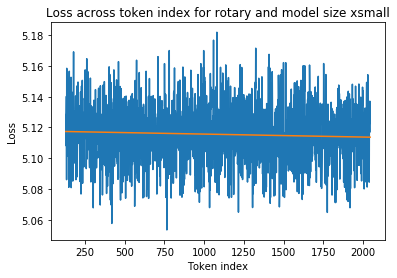

In [10]:
display_best_fit_2048_trained(size="xsmall", rel_pos_emb="linear_cpb")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="log_cpb")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="fourier_cpb")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="alibi")

display_best_fit_2048_trained(size="xsmall", rel_pos_emb="rotary")

In [11]:
def display_best_fit_2048_trained128(size="small", rel_pos_emb="linear_cpb"):
    a = np.load("results_relative/result_"+size+"_"+rel_pos_emb+"1_all_losses.npy", allow_pickle=True)

    all_avg = np.mean(a, axis=0)
    x = np.arange(len(all_avg))[128:]
    y = all_avg[128:]

    m, b = np.polyfit(x, y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(all_avg[1000] - all_avg[50])
    print("Meta-learning loss @ 500 - 50")
    print(all_avg[500] - all_avg[50])
    print("Meta-learning loss @ 250 - 50")
    print(all_avg[250] - all_avg[50])

    print("Model trained at length 128")
    print("Relative positional embedding type:", rel_pos_emb)
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.plot(x, all_avg[128:])
    plt.plot(x, m*x+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size " + size)
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
-0.05723726996176115
Meta-learning loss @ 500 - 50
-0.051095409669602354
Meta-learning loss @ 250 - 50
0.02729755449354876
Model trained at length 128
Relative positional embedding type: linear_cpb
Loss slope across token index: 9.444340483451466e-07
Loss offset: 5.206373560306571


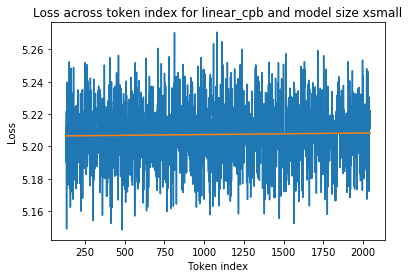

Meta-learning loss @ 1000 - 50
-0.053782748661015845
Meta-learning loss @ 500 - 50
-0.044004357803274274
Meta-learning loss @ 250 - 50
0.026669063275746474
Model trained at length 128
Relative positional embedding type: log_cpb
Loss slope across token index: 7.509394429990526e-07
Loss offset: 5.180688937656116


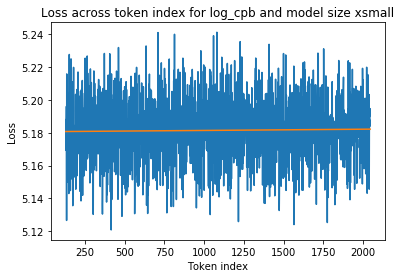

Meta-learning loss @ 1000 - 50
0.20681733183208717
Meta-learning loss @ 500 - 50
0.021908392161434698
Meta-learning loss @ 250 - 50
0.04936609735342312
Model trained at length 128
Relative positional embedding type: fourier_cpb
Loss slope across token index: 0.0002143076823028238
Loss offset: 5.218727376046655


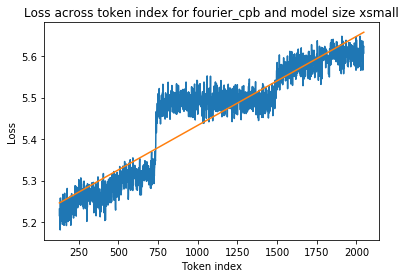

Meta-learning loss @ 1000 - 50
-0.05785303183515644
Meta-learning loss @ 500 - 50
-0.055721999971923175
Meta-learning loss @ 250 - 50
0.013251367180029838
Model trained at length 128
Relative positional embedding type: alibi
Loss slope across token index: 5.800215584963853e-07
Loss offset: 5.307181453022144


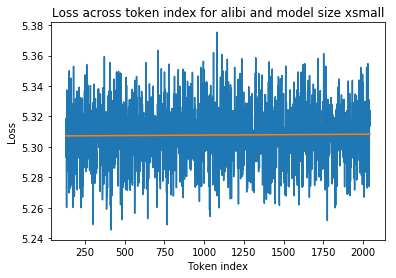

Meta-learning loss @ 1000 - 50
0.6191341508391961
Meta-learning loss @ 500 - 50
0.4526090774955618
Meta-learning loss @ 250 - 50
0.33125307109637436
Model trained at length 128
Relative positional embedding type: rotary
Loss slope across token index: 0.00019676482909821634
Loss offset: 5.6605749419326745


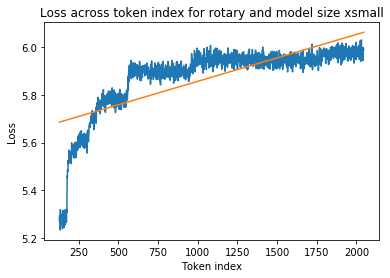

In [12]:
display_best_fit_2048_trained128("xsmall", "linear_cpb")
display_best_fit_2048_trained128("xsmall", "log_cpb")
display_best_fit_2048_trained128("xsmall", "fourier_cpb")
display_best_fit_2048_trained128("xsmall", "alibi")
display_best_fit_2048_trained128("xsmall", "rotary")

In [13]:
def display_best_fit_2048_long(rel_pos_emb="linear_cpb", length=256):
    a = np.load("xsmall_"+rel_pos_emb+"_" + str(length) + "_1_2048_losses.npz", allow_pickle=True)
    a = a.f.arr_0

    all_avg = np.mean(a, axis=0)

    x = np.arange(len(all_avg))
    y = all_avg[length:]

    m, b = np.polyfit(x[length:], y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(np.mean(all_avg[999:1002]) - np.mean(all_avg[49:52]))
    print("Meta-learning loss @ 500 - 50")
    print(np.mean(all_avg[499:502]) - np.mean(all_avg[49:52]))
    print("Meta-learning loss @ 250 - 50")
    print(np.mean(all_avg[249:252]) - np.mean(all_avg[49:52]))

    print("Meta learning improvment from 500 to 1000 tokens:")
    print((np.mean(all_avg[999:1002]) - np.mean(all_avg[49:52])) - (np.mean(all_avg[499:502]) - np.mean(all_avg[49:52])))

    print("Relative positional embedding type:", rel_pos_emb)
    print("Line of best fit for token loss in extrapolation region (indices > train length)")
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.xscale("log", basex=2)
    #plt.yscale("log", basey=2)
    plt.plot(x, all_avg)
    plt.plot(x[length:], m*x[length:]+b)
    plt.title("Loss across token index for " + rel_pos_emb + " and model size xsmall")
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
-0.016100337871903125
Meta-learning loss @ 500 - 50
-0.009350183484153618
Meta-learning loss @ 250 - 50
-0.004606127347403621
Meta learning improvment from 500 to 1000 tokens:
-0.006750154387749507
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 3.0287471886002346e-06
Loss offset: 3.9062929078084565


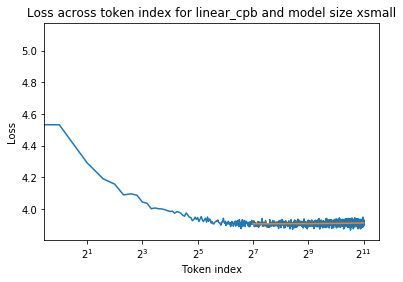

In [14]:
display_best_fit_2048_long("linear_cpb", 128)

Meta-learning loss @ 1000 - 50
-0.14041866996045815
Meta-learning loss @ 500 - 50
-0.12506576791589596
Meta-learning loss @ 250 - 50
-0.09995328364451561
Meta learning improvment from 500 to 1000 tokens:
-0.015352902044562189
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -5.21427621944125e-06
Loss offset: 3.6724990113564644


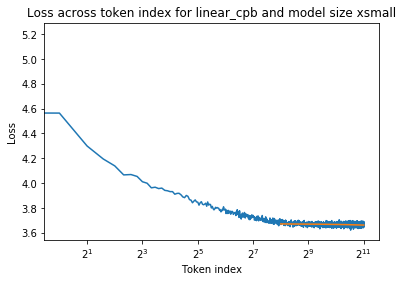

In [15]:
display_best_fit_2048_long("linear_cpb", 256)

Meta-learning loss @ 1000 - 50
-0.18108259739685195
Meta-learning loss @ 500 - 50
-0.16305121244624932
Meta-learning loss @ 250 - 50
-0.1312874801394881
Meta learning improvment from 500 to 1000 tokens:
-0.018031384950602636
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -5.9659728569453006e-06
Loss offset: 3.6052384736148215


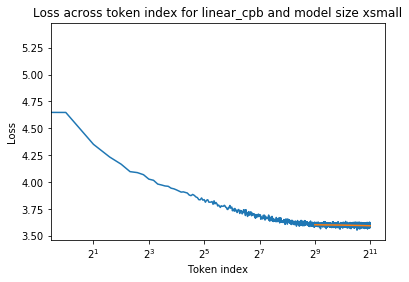

In [16]:
display_best_fit_2048_long("linear_cpb", 512)

Meta-learning loss @ 1000 - 50
-0.20725362367958589
Meta-learning loss @ 500 - 50
-0.1801102254401994
Meta-learning loss @ 250 - 50
-0.14711866029932574
Meta learning improvment from 500 to 1000 tokens:
-0.027143398239386496
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -8.245057547839198e-06
Loss offset: 3.6312941107528


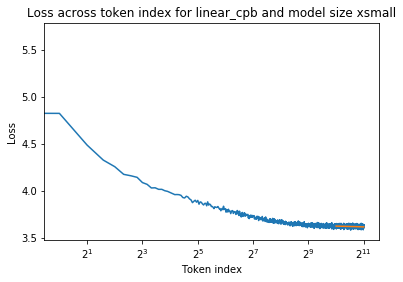

In [17]:
display_best_fit_2048_long("linear_cpb", 1024)

In [18]:
def display_best_fit_2048_long_ft(path, length):
    a = np.load(path, allow_pickle=True)
    a = a.f.arr_0

    all_avg = np.mean(a, axis=0)

    x = np.arange(len(all_avg))
    y = all_avg[length:]

    m, b = np.polyfit(x[length:], y, 1)

    print("Meta-learning loss @ 1000 - 50")
    print(np.mean(all_avg[999:1002]) - np.mean(all_avg[49:52]))
    print("Meta-learning loss @ 500 - 50")
    print(np.mean(all_avg[499:502]) - np.mean(all_avg[49:52]))
    print("Meta-learning loss @ 250 - 50")
    print(np.mean(all_avg[249:252]) - np.mean(all_avg[49:52]))

    print("Meta learning improvment from 500 to 1000 tokens:")
    print((np.mean(all_avg[999:1002]) - np.mean(all_avg[49:52])) - (np.mean(all_avg[499:502]) - np.mean(all_avg[49:52])))

    print("Relative positional embedding type: linear_cpb")
    print("Line of best fit for token loss in extrapolation region (indices > train length)")
    print("Loss slope across token index:", m)
    print("Loss offset:", b)
    plt.xscale("log", basex=2)
    #plt.yscale("log", basey=2)
    plt.plot(x, all_avg)
    plt.plot(x[length:], m*x[length:]+b)
    plt.title("Loss across token index for linear_cpb and model size xsmall")
    plt.ylabel("Loss")
    plt.xlabel("Token index")
    plt.show()

Meta-learning loss @ 1000 - 50
0.06636530606842017
Meta-learning loss @ 500 - 50
0.044861339020901614
Meta-learning loss @ 250 - 50
0.01658881490577757
Meta learning improvment from 500 to 1000 tokens:
0.021503967047518557
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 3.777661580974691e-05
Loss offset: 3.952889729119216


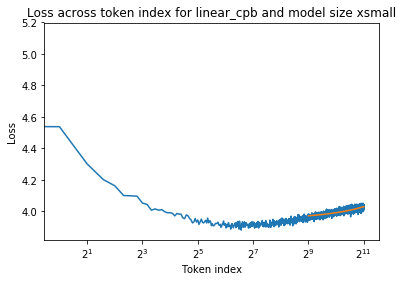

In [19]:
display_best_fit_2048_long_ft("xsmall_linear_cpb_128_1_finetuned_512_25steps_2048_losses.npz", 512)

Meta-learning loss @ 1000 - 50
-0.014852157695452561
Meta-learning loss @ 500 - 50
-0.005560618296064135
Meta-learning loss @ 250 - 50
-0.004649141566183346
Meta learning improvment from 500 to 1000 tokens:
-0.009291539399388427
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 1.8750481800144998e-06
Loss offset: 3.88475865530163


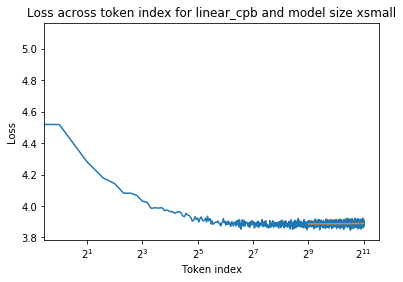

Meta-learning loss @ 1000 - 50
-0.02311524784207819
Meta-learning loss @ 500 - 50
-0.013481332656555267
Meta-learning loss @ 250 - 50
-0.010695394562331373
Meta learning improvment from 500 to 1000 tokens:
-0.009633915185522923
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 1.6432423101243018e-06
Loss offset: 3.866318731171586


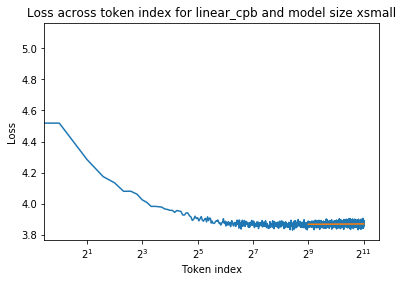

Meta-learning loss @ 1000 - 50
0.015887803927031374
Meta-learning loss @ 500 - 50
0.01667026787635484
Meta-learning loss @ 250 - 50
0.005920385993553268
Meta learning improvment from 500 to 1000 tokens:
-0.0007824639493234642
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 8.302076589119298e-06
Loss offset: 3.8994856573445955


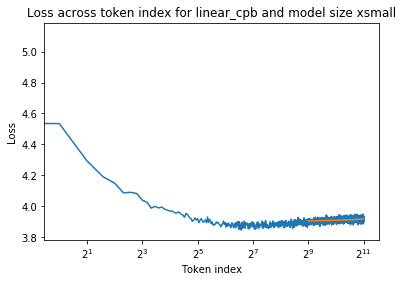

Meta-learning loss @ 1000 - 50
-0.019774342225065134
Meta-learning loss @ 500 - 50
-0.017900683638801596
Meta-learning loss @ 250 - 50
-0.008461860832037704
Meta learning improvment from 500 to 1000 tokens:
-0.001873658586263538
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 1.551037147744666e-06
Loss offset: 3.9161189320175325


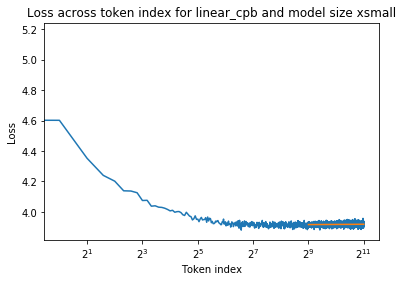

In [22]:
display_best_fit_2048_long_ft("xsmall_linear_cpb_128_1_finetuned_512_100steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_128_1_finetuned_512_200steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_128_1_finetuned_512_500steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_128_1_finetuned_512_1000steps_2048_losses.npz", 512)

Meta-learning loss @ 1000 - 50
-0.141357551006013
Meta-learning loss @ 500 - 50
-0.1343126541338422
Meta-learning loss @ 250 - 50
-0.10622757052044696
Meta learning improvment from 500 to 1000 tokens:
-0.007044896872170803
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 5.262380565601298e-07
Loss offset: 3.663040143915925


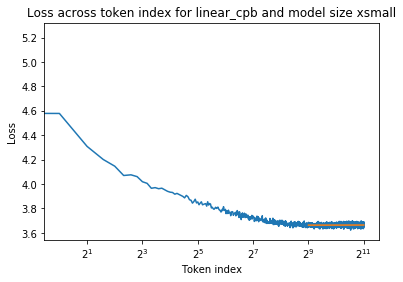

Meta-learning loss @ 1000 - 50
-0.13697253469255832
Meta-learning loss @ 500 - 50
-0.12385010503167138
Meta-learning loss @ 250 - 50
-0.09847227592278696
Meta learning improvment from 500 to 1000 tokens:
-0.013122429660886947
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 8.697757108255449e-07
Loss offset: 3.6691733507510067


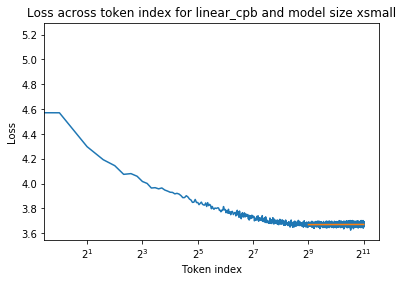

Meta-learning loss @ 1000 - 50
-0.13899365359769433
Meta-learning loss @ 500 - 50
-0.12556477044174086
Meta-learning loss @ 250 - 50
-0.10037292450236057
Meta learning improvment from 500 to 1000 tokens:
-0.013428883155953475
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 9.532774776652936e-07
Loss offset: 3.653114482220953


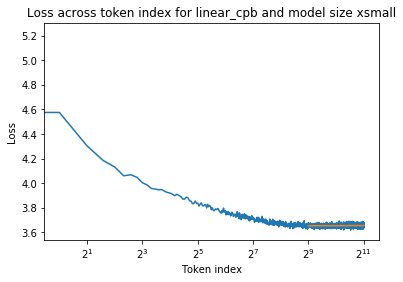

Meta-learning loss @ 1000 - 50
-0.13771533904719568
Meta-learning loss @ 500 - 50
-0.1255111402608371
Meta-learning loss @ 250 - 50
-0.10119493493288978
Meta learning improvment from 500 to 1000 tokens:
-0.012204198786358589
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 3.392044212318058e-06
Loss offset: 3.6544431530990584


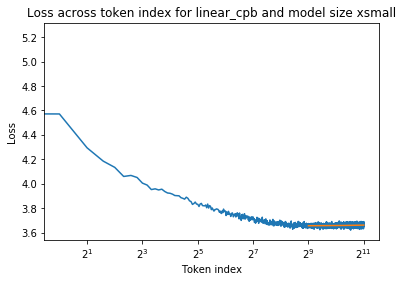

Meta-learning loss @ 1000 - 50
-0.15054383861741805
Meta-learning loss @ 500 - 50
-0.1385206436235653
Meta-learning loss @ 250 - 50
-0.10711141330183338
Meta learning improvment from 500 to 1000 tokens:
-0.012023194993852737
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -4.2805077056520835e-06
Loss offset: 3.6893357824444073


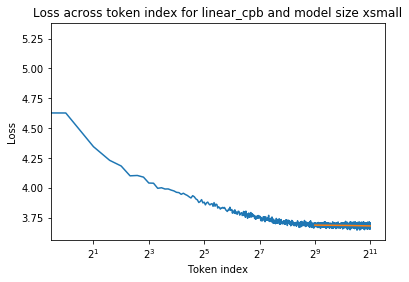

Meta-learning loss @ 1000 - 50
-0.1401913131268202
Meta-learning loss @ 500 - 50
-0.12661859647032747
Meta-learning loss @ 250 - 50
-0.09929421396226346
Meta learning improvment from 500 to 1000 tokens:
-0.013572716656492734
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: 2.5435771199166776e-07
Loss offset: 3.664243520409277


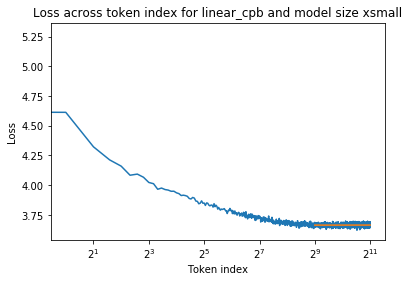

Meta-learning loss @ 1000 - 50
-0.15683771810613534
Meta-learning loss @ 500 - 50
-0.14346311081600627
Meta-learning loss @ 250 - 50
-0.11517723773528532
Meta learning improvment from 500 to 1000 tokens:
-0.01337460729012907
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -8.889110660305178e-07
Loss offset: 3.68660509027791


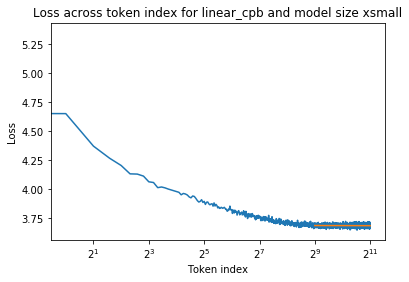

In [27]:
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_25steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_100steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_200steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_500steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_1000steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_2000steps_2048_losses.npz", 512)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_512_5000steps_2048_losses.npz", 512)

Meta-learning loss @ 1000 - 50
-0.15446539156191408
Meta-learning loss @ 500 - 50
-0.14245072552785842
Meta-learning loss @ 250 - 50
-0.11351404419984723
Meta learning improvment from 500 to 1000 tokens:
-0.012014666034055654
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -2.020741838711918e-06
Loss offset: 3.6555159328983584


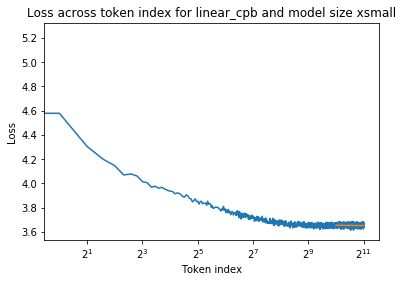

Meta-learning loss @ 1000 - 50
-0.15474458590003337
Meta-learning loss @ 500 - 50
-0.13729788162056655
Meta-learning loss @ 250 - 50
-0.11087436530765515
Meta learning improvment from 500 to 1000 tokens:
-0.017446704279466818
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -4.992448911186365e-06
Loss offset: 3.6512939929176946


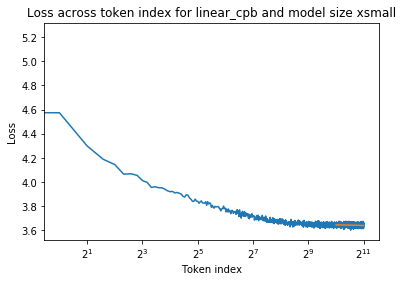

Meta-learning loss @ 1000 - 50
-0.15849936875967963
Meta-learning loss @ 500 - 50
-0.14053686020605305
Meta-learning loss @ 250 - 50
-0.11327382685937026
Meta learning improvment from 500 to 1000 tokens:
-0.017962508553626577
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -2.77536562446169e-06
Loss offset: 3.6322545840671654


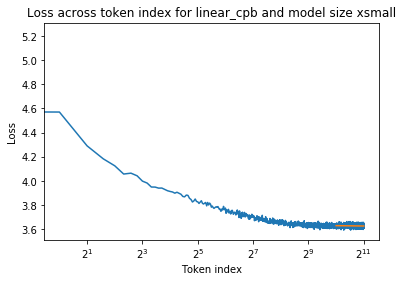

Meta-learning loss @ 1000 - 50
-0.15621819908115597
Meta-learning loss @ 500 - 50
-0.14153075259391334
Meta-learning loss @ 250 - 50
-0.11137908691937026
Meta learning improvment from 500 to 1000 tokens:
-0.014687446487242628
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -2.3221432373593535e-06
Loss offset: 3.6492171038469854


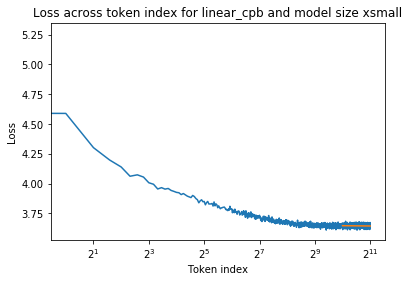

Meta-learning loss @ 1000 - 50
-0.16917540363797734
Meta-learning loss @ 500 - 50
-0.15375285588254517
Meta-learning loss @ 250 - 50
-0.11942574822286733
Meta learning improvment from 500 to 1000 tokens:
-0.01542254775543217
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -5.53094509326523e-06
Loss offset: 3.671016397297661


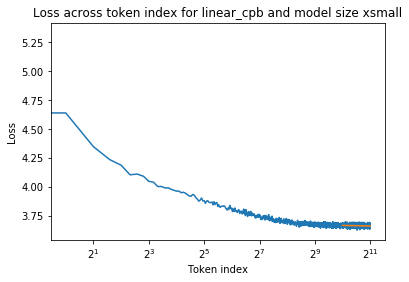

Meta-learning loss @ 1000 - 50
-0.16909229582835206
Meta-learning loss @ 500 - 50
-0.14815260283987186
Meta-learning loss @ 250 - 50
-0.11932393752610704
Meta learning improvment from 500 to 1000 tokens:
-0.020939692988480196
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -4.69323333425273e-06
Loss offset: 3.6374842851328695


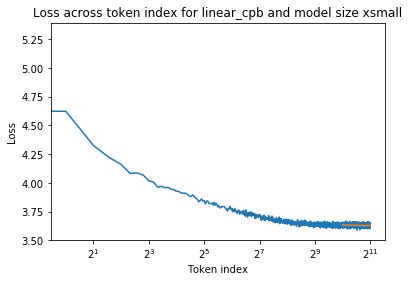

Meta-learning loss @ 1000 - 50
-0.17349238364095587
Meta-learning loss @ 500 - 50
-0.15733329570486676
Meta-learning loss @ 250 - 50
-0.12759450902315672
Meta learning improvment from 500 to 1000 tokens:
-0.01615908793608911
Relative positional embedding type: linear_cpb
Line of best fit for token loss in extrapolation region (indices > train length)
Loss slope across token index: -5.39603161637387e-06
Loss offset: 3.656321654281963


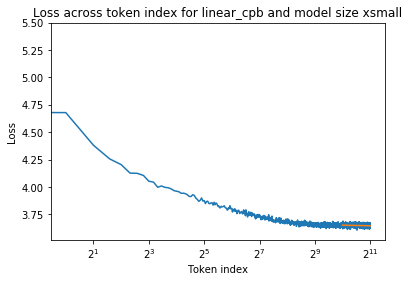

In [28]:
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_25steps_2048_losses.npz", 1024)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_100steps_2048_losses.npz", 1024)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_200steps_2048_losses.npz", 1024)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_500steps_2048_losses.npz", 1024)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_1000steps_2048_losses.npz", 1024)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_2000steps_2048_losses.npz", 1024)
display_best_fit_2048_long_ft("xsmall_linear_cpb_256_1_finetuned_1024_5000steps_2048_losses.npz", 1024)